In [1]:
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
train_df = pd.read_csv("creditcard.csv")
X = train_df.drop(columns=['Class'])
y = train_df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)       


y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [6]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
train_df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

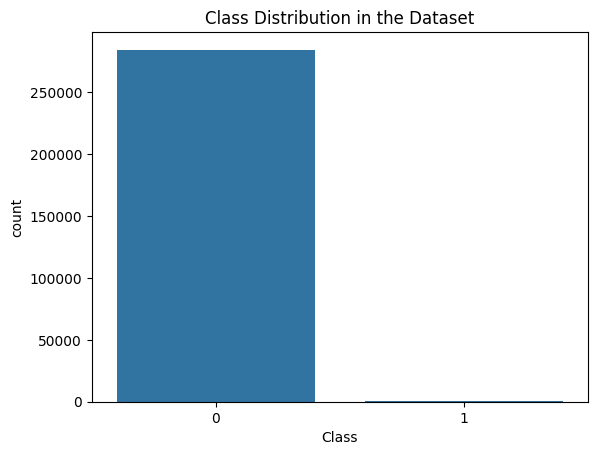

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Class' is the column indicating the class in your dataset
sns.countplot(x='Class', data=train_df)
plt.title('Class Distribution in the Dataset')
plt.show()

<Axes: >

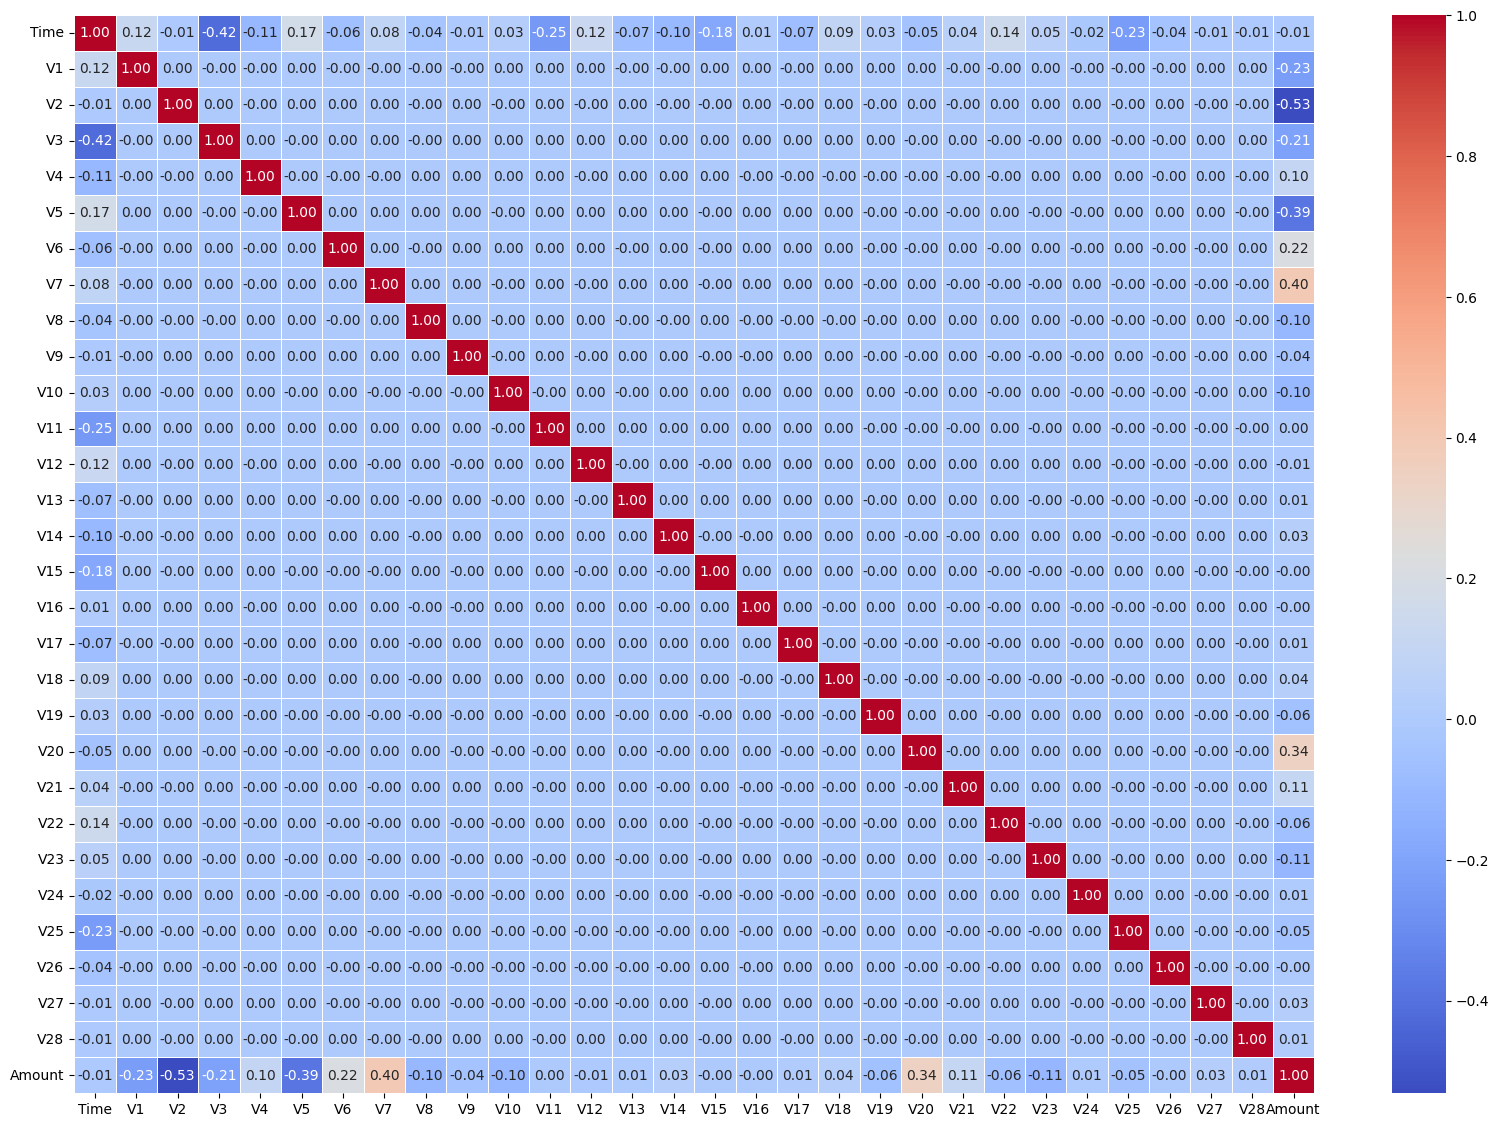

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


In [15]:
#1.LOGISTIC REGRESSION

# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
# predictiing the test result
y_pred = classifier.predict(X_test)

<Axes: >

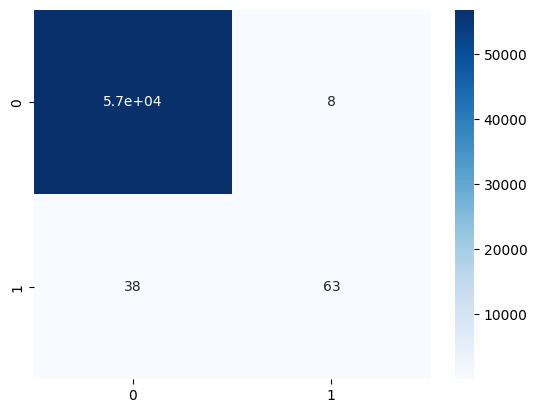

In [17]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True,cmap='Blues')

In [18]:
#find accuracy
from sklearn.metrics import accuracy_score
print('logistic regression:',accuracy_score(y_test,y_pred))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

logistic regression: 0.9991924440855307
f1_score: 0.7325581395348837
precision_score: 0.8873239436619719
recall_score: 0.6237623762376238


In [19]:
#2.NAIVE BAYES

# Fitting naive byes classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [20]:
# Predicting the Test set results
y_pred2 = classifier.predict(X_test)

<Axes: >

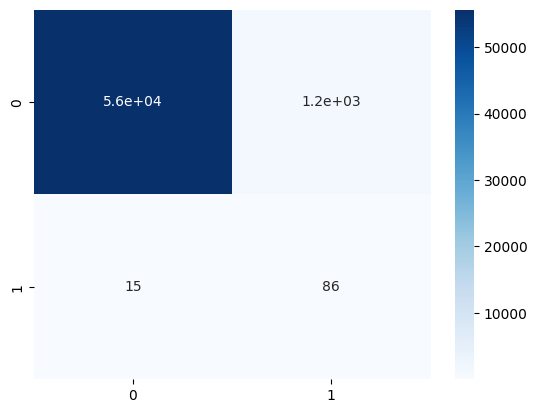

In [21]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
import seaborn as sns
sns.heatmap(cm2, annot=True, cmap = 'Blues')

In [22]:
#find accuracy
from sklearn.metrics import accuracy_score
print('naive byes:',accuracy_score(y_test,y_pred2))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred2))
print('precision_score:',precision_score(y_test,y_pred2))
print('recall_score:',recall_score(y_test,y_pred2))

naive byes: 0.9782311014360451
f1_score: 0.12181303116147309
precision_score: 0.06559877955758962
recall_score: 0.8514851485148515


In [23]:
#3.DESISION TREE

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
# Predicting the Test set results
y_pred3 = classifier.predict(X_test)

<Axes: >

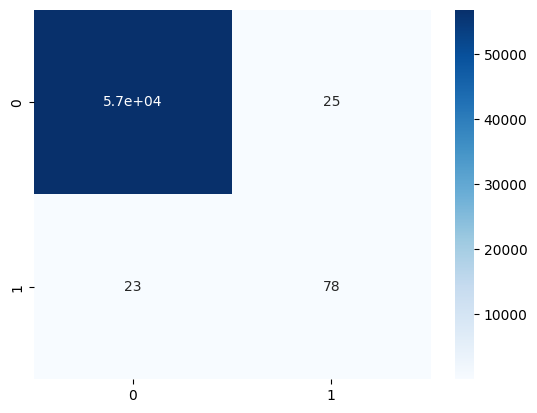

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)
import seaborn as sns
sns.heatmap(cm3, annot=True, cmap = 'Blues')

In [26]:
#find accuracy
from sklearn.metrics import accuracy_score
print('decision tree:',accuracy_score(y_test,y_pred3))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred3))
print('precision_score:',precision_score(y_test,y_pred3))
print('recall_score:',recall_score(y_test,y_pred3))

decision tree: 0.9991573329588147
f1_score: 0.7647058823529411
precision_score: 0.7572815533980582
recall_score: 0.7722772277227723


In [28]:
#4. RANDOM FOREST
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [29]:
# Predicting the Test set results
y_pred4 = classifier.predict(X_test)

<Axes: >

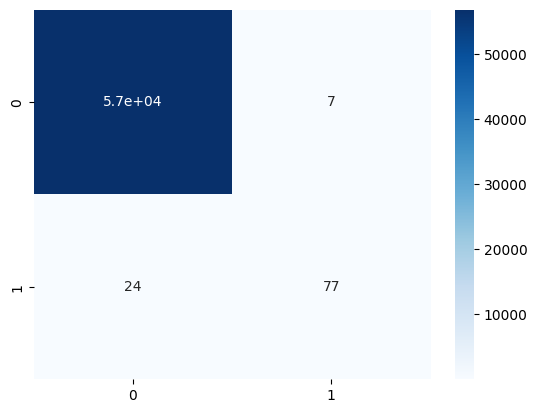

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
import seaborn as sns
sns.heatmap(cm4, annot=True, cmap = 'Blues')

In [31]:
#find accuracy
from sklearn.metrics import accuracy_score
print('random forest:',accuracy_score(y_test,y_pred4))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred4))
print('precision_score:',precision_score(y_test,y_pred4))
print('recall_score:',recall_score(y_test,y_pred4))

random forest: 0.9994557775359011
f1_score: 0.8324324324324325
precision_score: 0.9166666666666666
recall_score: 0.7623762376237624


In [32]:
#5.ANN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

In [33]:
# Initialising the ANN
classifier = Sequential()
classifier.add(Dense(10, activation = 'relu', input_dim = 30))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(1,  activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 10)            │          310 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │          110 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 1)             │           11 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 431 (1.68 KB)

 Trainable params: 431 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20)

Epoch 1/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6584 - loss: 0.5817
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9981 - loss: 0.0380
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 0.0102
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 0.0065
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9990 - loss: 0.0045
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9993 - loss: 0.0042
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 9/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0037
Epoch 10/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0032  
Epoch 11/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 12/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [35]:
# Predicting the Test set results
y_pred5 = classifier.predict(X_test).round()
y_pred5 = (y_pred5 > 0.5)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step


<Axes: >

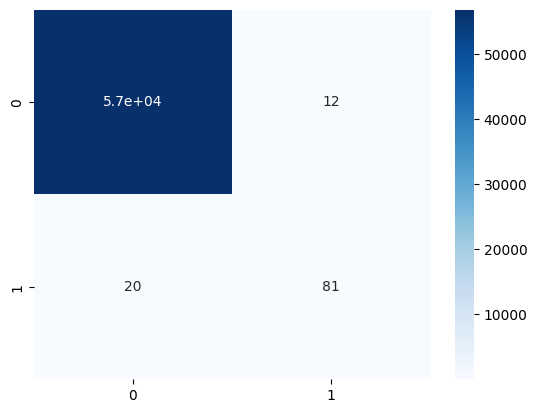

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True, cmap = 'Blues')

In [37]:
#find accuracy
from sklearn.metrics import accuracy_score
print('ANN:',accuracy_score(y_test,y_pred5))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred5))
print('precision_score:',precision_score(y_test,y_pred5))
print('recall_score:',recall_score(y_test,y_pred5))

ANN: 0.9994382219725431
f1_score: 0.8350515463917526
precision_score: 0.8709677419354839
recall_score: 0.801980198019802


In [38]:
#applyting SMOTE
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [39]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [40]:
fraud = train_df[train_df['Class'] == 1]
valid = train_df[train_df['Class'] == 0]

print("Fraud transaction statistics")
print(fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(valid["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [41]:
# describes info about train and test set
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (227845, 30)
y_train dataset:  (227845,)
X_test dataset:  (56962, 30)
y_test dataset:  (56962,)


In [42]:
print("before applying smote:",format(sum(y_train == 1)))
print("before applying smote:",format(sum(y_train == 0)))

before applying smote: 391
before applying smote: 227454


In [43]:
!pip install imblearn

                                              0.0/258.3 kB ? eta -:--:--
     ---------------------                  143.4/258.3 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 258.3/258.3 kB 4.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:

!pip install --upgrade scikit-learn

                                              0.0/11.0 MB ? eta -:--:--
                                              0.1/11.0 MB 2.6 MB/s eta 0:00:05
     -                                        0.3/11.0 MB 3.5 MB/s eta 0:00:04
     -                                        0.5/11.0 MB 3.8 MB/s eta 0:00:03
     --                                       0.7/11.0 MB 4.0 MB/s eta 0:00:03
     ---                                      0.9/11.0 MB 4.3 MB/s eta 0:00:03
     ----                                     1.2/11.0 MB 4.6 MB/s eta 0:00:03
     -----                                    1.5/11.0 MB 4.7 MB/s eta 0:00:03
     ------                                   1.8/11.0 MB 5.0 MB/s eta 0:00:02
     -------                                  2.1/11.0 MB 5.2 MB/s eta 0:00:02
     --------                                 2.4/11.0 MB 5.3 MB/s eta 0:00:02
     ---------                                2.7/11.0 MB 5.3 MB/s eta 0:00:02
     ----------                               3.0/11.0 MB 5

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python311\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
!pip show scikit-learn
!pip show imbalanced-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [47]:
X_train.shape

(227845, 30)

In [48]:
y_train.shape

(227845,)

In [49]:
train_df = pd.read_csv("creditcard.csv")
X = train_df.drop(columns={'Class'})
y = train_df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)


print('After applying SMOTE X_train: {}\n'.format(X_train.shape))
print('After applying SMOTE y_train: {}\n'.format(y_train.shape))

print("After applying SMOTE label '1': {}\n".format(sum(y_train == 1)))
print("After applying SMOTE label '0': {}\n".format(sum(y_train == 0)))

After applying SMOTE X_train: (454908, 30)

After applying SMOTE y_train: (454908,)

After applying SMOTE label '1': 227454

After applying SMOTE label '0': 227454

